# **Project 2 - Customer Segmentation System**

**Customer Segmentation**

Customer segmentation is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers (known as segments) based on some type of shared characteristics. The overall aim of segmentation is to identify high yield segments – that is, those segments that are likely to be the most profitable or that have growth potential – so that these can be selected for special attention

# **1. Importing the required libraries**



In [2]:
#importing the required libraries
import pandas as pd
import numpy as np

#viz libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')

#datetime
import datetime as dt

#StandardScaler
from sklearn.preprocessing import StandardScaler

#KMeans
from sklearn.cluster import KMeans


# **Reading the data**

In [3]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding = 'unicode_escape')

In [4]:
#checking the dimensions of the data
df.shape

(2823, 25)

In [5]:
#Glimpse of the data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# **Dropping Columns**

In [6]:
#Removing variables which don't add significant value for the analysis
to_drop = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE']
df = df.drop(to_drop, axis=1)

# **Checking for null values**

In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

**Not dealing with the mising values of 'Territory' Variable as it may not have a significant effect on the analysis.**

# **Checking for inconsistent data types**

In [8]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

**Changing the datatype of variable 'ORDERDATE' from object to datetime**

In [9]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

**Summary stats of Quantitative variables**

In [10]:
quant_vars = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
df[quant_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


**It is observed that there are no negative values for the quantitative variables, which is a good sign because we cannot have negative prices or quantities.**

# **Exploring the variables**

## **Order Quantity Distribution**

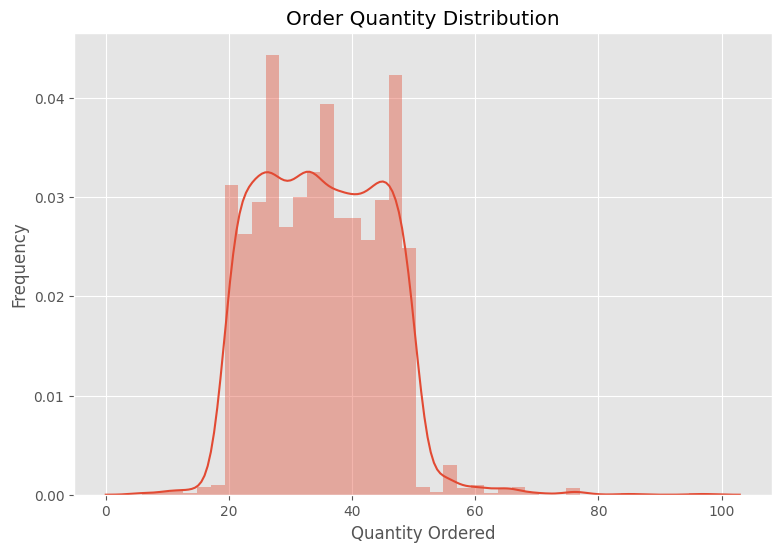

In [11]:
plt.figure(figsize=(9,6))
sns.distplot(df['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

**From the distribution plot of quantity, we can infer that the orders are bulk orders. Majority of the order's quantity are between 20 -40 units.**

## **Price Distribution**

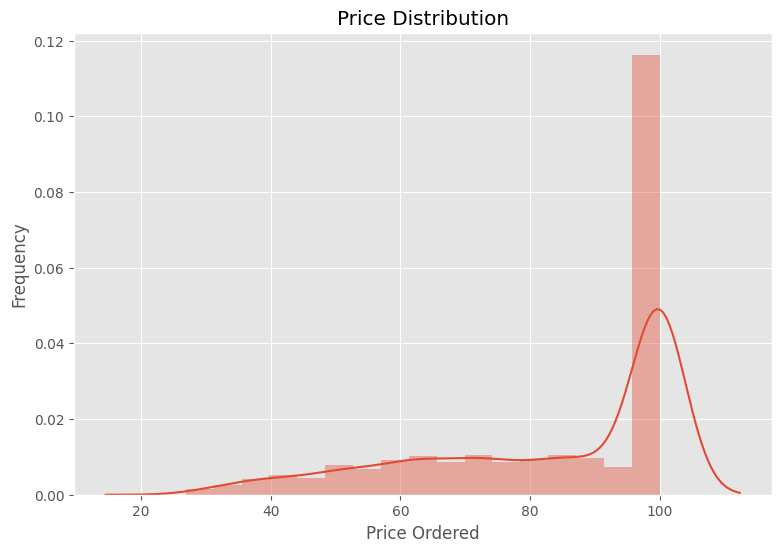

In [12]:
plt.figure(figsize=(9,6))
sns.distplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

**The distribution of Price is Left Skewed with max price of 100$. Interestingly, many of the orders recieved are of this price. Not investigating further about this particular product line which has the highest price beacuse the target is to segment the customers.**

## **Sales Distribution**

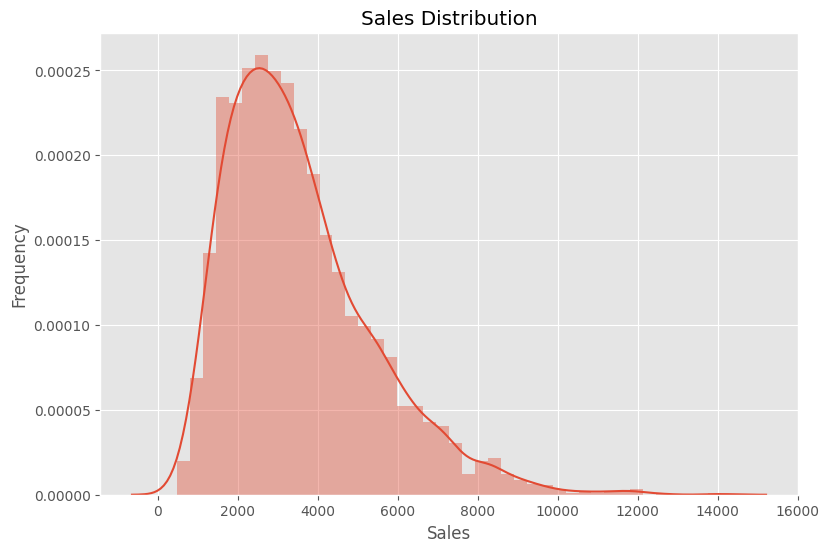

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(df['SALES'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## **Analyzing the STATUS variable**

In [14]:
df['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

## **Checking the time range of the data**

In [15]:
df.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

**We dont have the complete data for 2005.**

## **Dealsize Distribution**

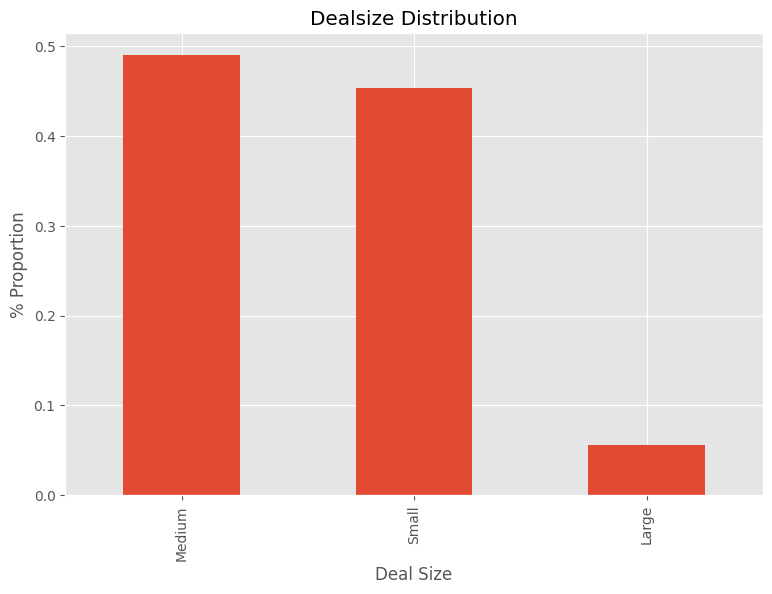

In [16]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize=True).plot(kind = 'bar')
plt.title('Dealsize Distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

# **Analyzing KPIs**

## **Annual Revenue**

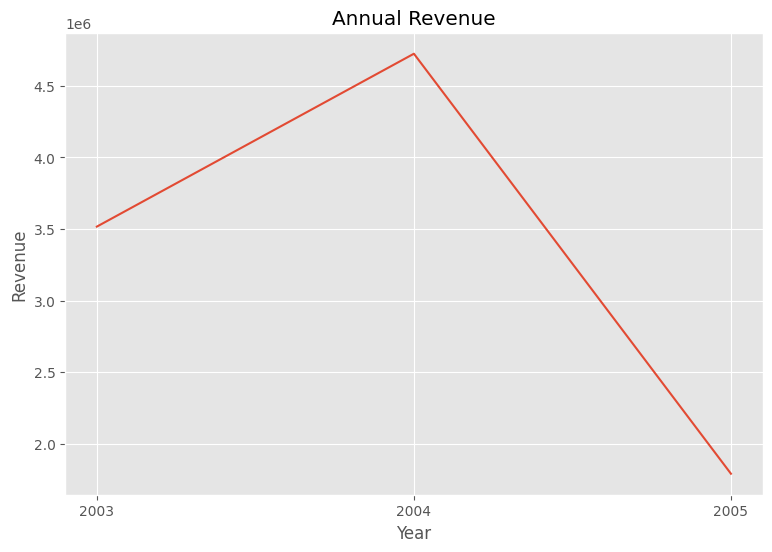

In [17]:
#Annual Revenue
plt.figure(figsize = (9,6))
df.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003, 2006, 1))
plt.show()

**As we dont have the complete data for 2005, analyzing the Annual Revenue can be misleading. Instead, we can analyze Monthy Revenue.**

## **Monthly Revenue**

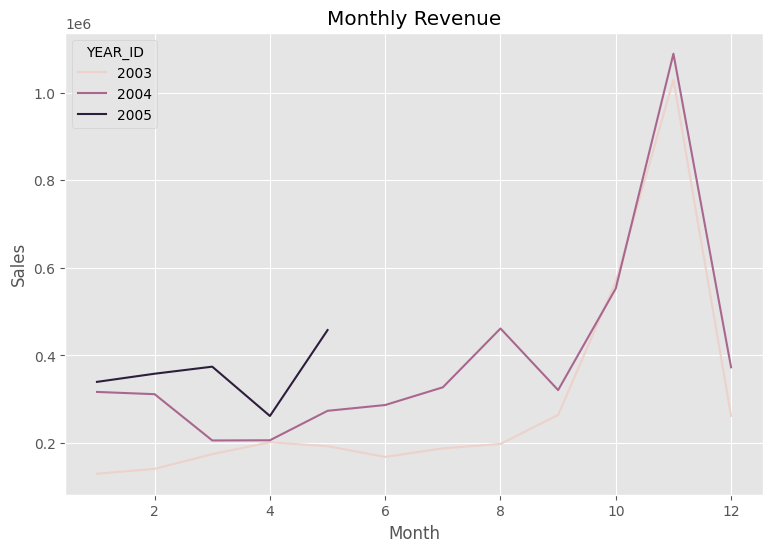

In [18]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES", hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

**This clearly shows that the revenue is growing especially in October and November. It can be the result of the seasonality(Thnaks Giving and other festivitues). We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future.**

Monthly Revenue Growth Rate:

In [19]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()

In [20]:
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


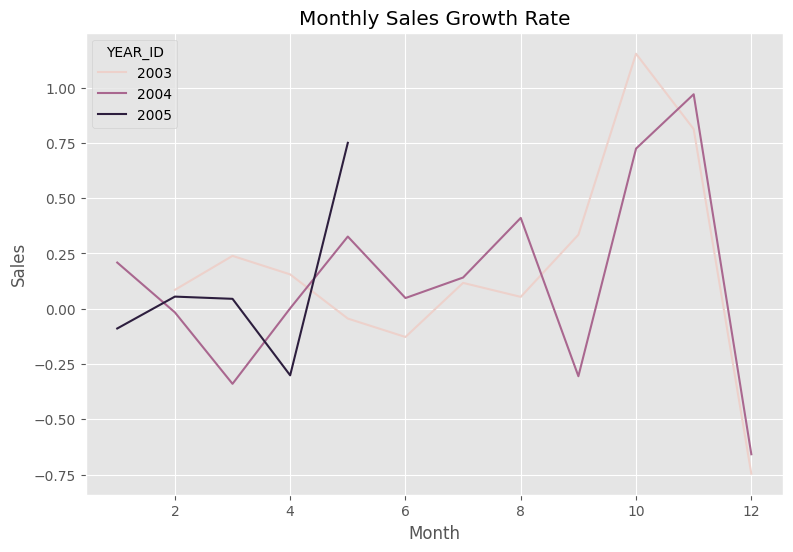

In [21]:
#Monthly Sales Growth Rate
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH", hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

**Apart from expected high/low growth rates during the seasonal months, there is hig growth rate from Apr 2005 to May 2005.**

# **Top 10 countries by Sales**

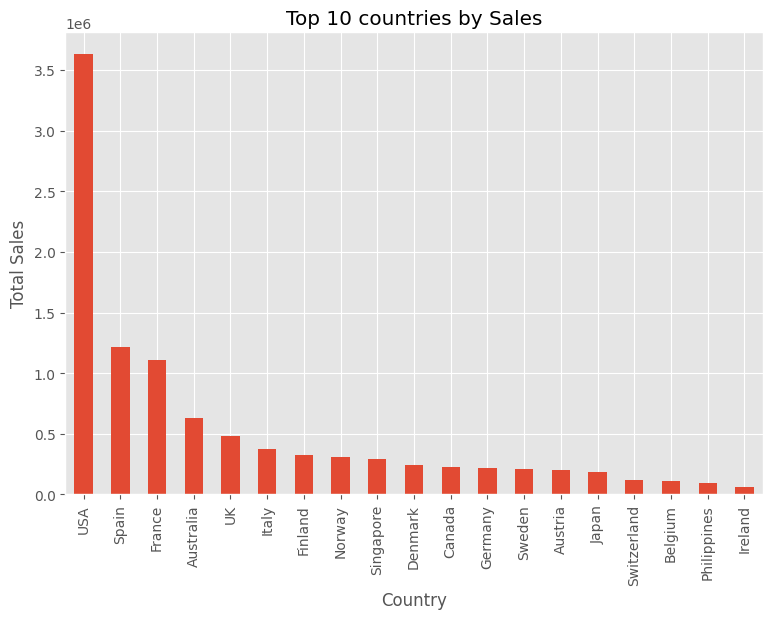

In [22]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

# **Monthly Active Customers**

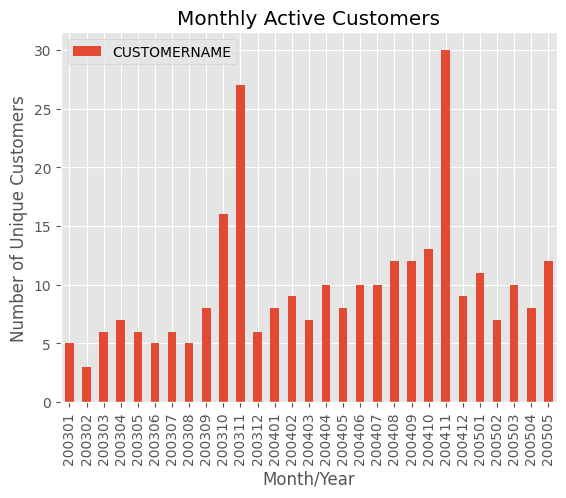

In [23]:
#plt.figure(figsize=(10,8))
df['YEAR_MONTH'] = df['YEAR_ID'].map(str)+df['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME')
#plt.figure(figsize=(10,8))
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
#plt.figure(figsize=(10,8))
plt.show()

**As expected, customers are highly active during the months of November and October. The number of active customers increased from 2003 to 2004 which indicates that the company is successful in retention/acquisition of ol/new customers.**

# **Average Sales per order**

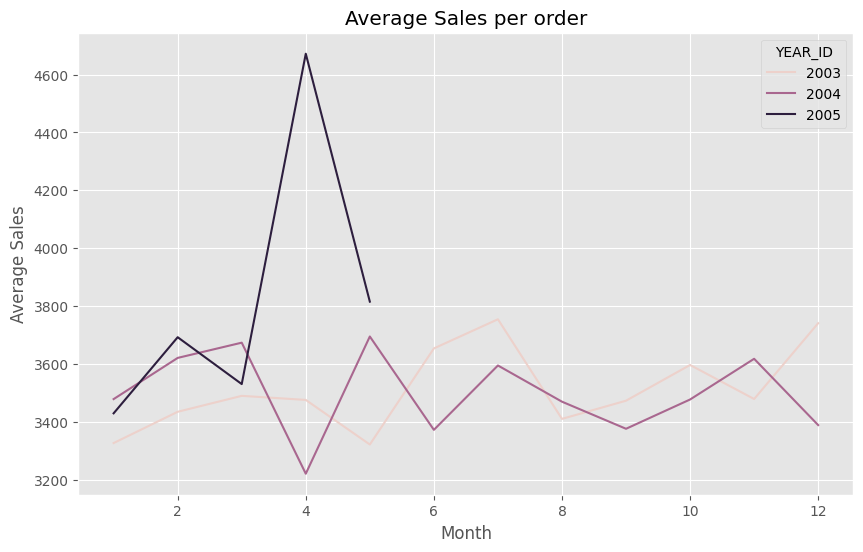

In [24]:
#Average Sales per Order
average_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per order')
plt.show()

## **New Customers Growth Rate**

**New customer is whoever did his/her first purchase in the time window we defined, i.e., Mothly in this analysis.**

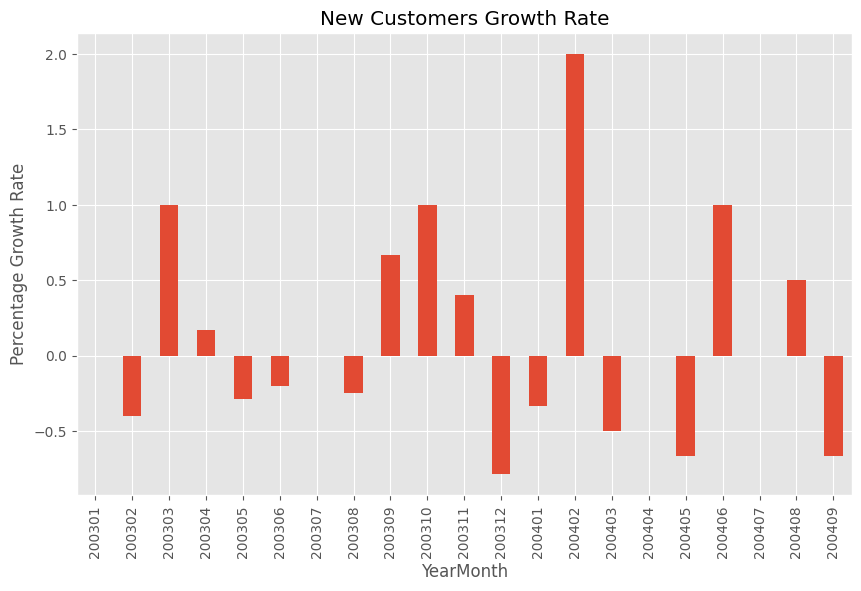

In [25]:
#New Customers Growth Rate
df_first_purchase = df.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
df_first_purchase.columns = ['CUSTOMERNAME','FirstPurchaseDate']

plt.figure(figsize=(10,6))
df_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')

plt.title('New Customers Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Growth Rate')
plt.show()

**The highest growth rate is observed in February 2002. This can be investigated further to betetr understand what factors contributed the growth.**

# **Segmentation with number of clusters chosen randomly**

In [26]:
df['ORDERDATE'] = [d.date() for d in df['ORDERDATE']]
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR_MONTH
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,USA,NaN,Yu,Kwai,Small,200302
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,France,EMEA,Henriot,Paul,Small,200305
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Da Cunha,Daniel,Medium,200307
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,NaN,Young,Julie,Medium,200308
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NaN,Brown,Julie,Medium,200310


**Calculate Recency, Frequency and Monetary value for each customer**

Assuming that we are analyzing the next day of latest order date in the data set. Creating a variable 'snapshot date' which is the latest date in data set.

**Recency :** Recency is the number of days between the customer's latest order date and the snapshot date
<br>**Frequency:** Number of purchases made by the customer
<br>**MonetaryValue:** Revenue generated by the customer

In [27]:
# Calculate Recency, Frequency and Monetary value for each customer
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days=1) #latest date in the data set
df_RFM = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

#Renaming the columns
df_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)

In [28]:
df_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [29]:
#Dividing into segments

# Create a spend quartile with 4 groups - a range between 1 and 5
MonetaryValue_quartile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1,5))
Recency_quartile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(df_RFM['Frequency'], q=4, labels=range(1,5))

# Assign the quartile values to the Spend_Quartile column in data
df_RFM['R'] = Recency_quartile
df_RFM['F'] = Frequency_quartile
df_RFM['M'] = MonetaryValue_quartile

#df_RFM[['MonetaryValue_Quartile','Recency_quartile','Frequency_quartile']] = [MonetaryValue_quartile,Recency_quartile,Frequency_quartile]

# Print data with sorted Spend values
#print(df_RFM.sort_values('MonetaryValue'))

df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4
Alpha Cognac,65,20,70488.44,4,2,2
Amica Models & Co.,265,26,94117.26,1,2,3
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4
Atelier graphique,188,7,24179.96,2,1,1


# **Calculating RFM Score**

In [30]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10
Alpha Cognac,65,20,70488.44,4,2,2,8
Amica Models & Co.,265,26,94117.26,1,2,3,6
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11
Atelier graphique,188,7,24179.96,2,1,1,4


# **Labelling the levels**

* RFM Score > 10 - **High Value Customer**
* RFM SCore < 10 and RFM Score >= 6 - **Mid Value Customer**
* RFM Score < 6 - **Low Value Customer**

In [31]:
#Naming Levels
#Define rfm_level function
def rfm_level(df):
  if np.bool(df['RFM_Score'] >= 10):
    return 'High Value Customer'
  elif np.bool((df['RFM_Score'] < 10) & (df['RFM_Score'] >= 6)):
    return 'Mid Value Customer'
  else:
    return 'Low Value Customer'

# Create a new variable RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis = 1)

#Print the header with top 5 rows to the console
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10,High Value Customer
Alpha Cognac,65,20,70488.44,4,2,2,8,Mid Value Customer
Amica Models & Co.,265,26,94117.26,1,2,3,6,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11,High Value Customer
Atelier graphique,188,7,24179.96,2,1,1,4,Low Value Customer


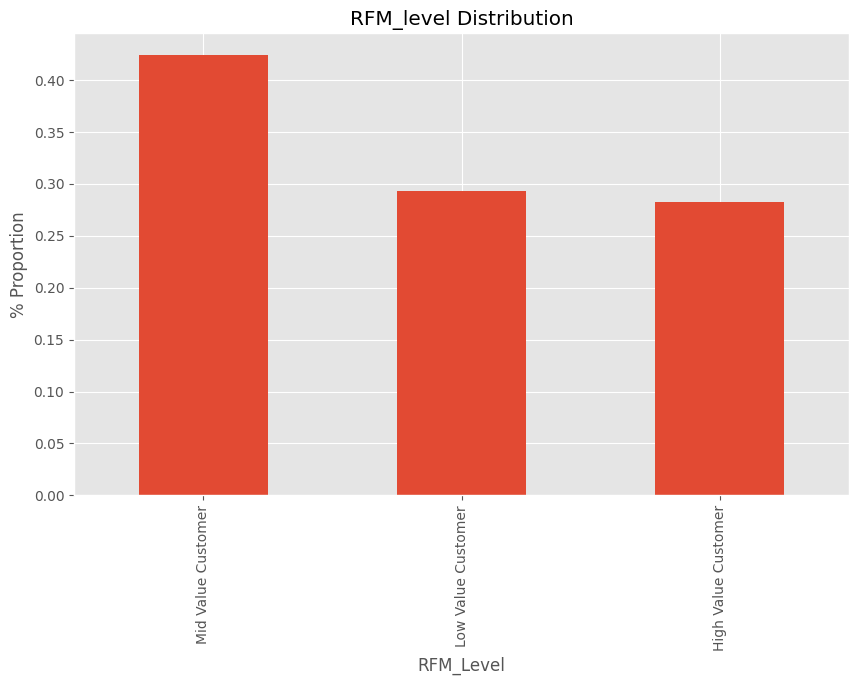

In [32]:
plt.figure(figsize=(10,6))
df_RFM['RFM_Level'].value_counts(normalize=True).plot(kind = 'bar')
plt.title('RFM_level Distribution')
plt.xlabel('RFM_Level')
plt.ylabel('% Proportion')
plt.show()

## **Higher the monetary value, higher the MonetaryValue level**

In [33]:
#Analyzing customer segments
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = df_RFM.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean','count']}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                    Recency Frequency MonetaryValue      
                       mean      mean          mean count
RFM_Level                                                
High Value Customer    85.0      54.3      193532.1    26
Low Value Customer    293.8      15.0       52414.6    27
Mid Value Customer    171.2      25.8       91938.5    39


# **Segmentation using KMeans Clustering**

# **Data Preprocessing for KMeans**

### **KMeans Assumption**
* All variables have symmetrical (Normal) Distribution
* All Variables have same average value(approx)
* All Variables have same variance(approx)

## **Check the distribution of the variables**

In [34]:
data = df_RFM[['Recency', 'Frequency', 'MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


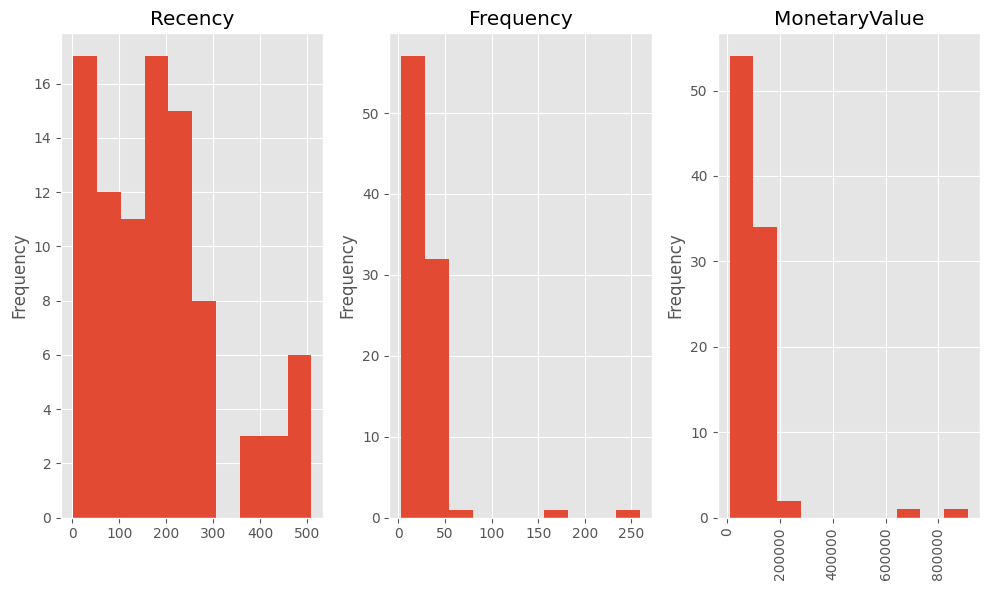

In [35]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
data['Recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
data['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
data['MonetaryValue'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()

## **Removing the skewness by performing log transformation on the variables**

In [36]:
data_log = np.log(data)

In [37]:
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


## **Distribution of Recency, Frequency and MonetaryValue after Log Transformation**

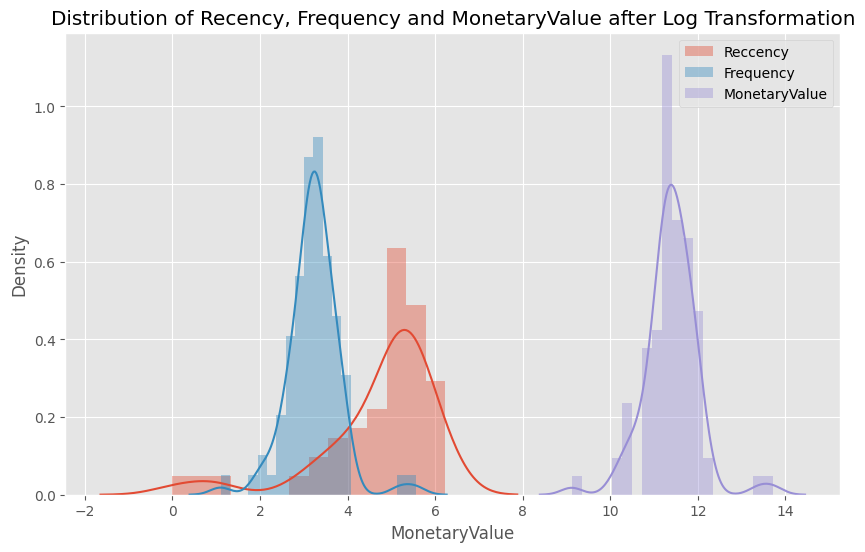

In [38]:
plt.figure(figsize=(10,6))

#plt.subplot(1,3,1)
sns.distplot(data_log['Recency'], label='Reccency')

#plt.subplot(1,3,1)
sns.distplot(data_log['Frequency'], label='Frequency')

#plt.subplot(1,3,1)
sns.distplot(data_log['MonetaryValue'], label = 'MonetaryValue')

plt.title('Distribution of Recency, Frequency and MonetaryValue after Log Transformation')
plt.legend()
plt.show()


**Standardizing the variables using StandardScaler() for equal variance and mean**

In [40]:
#Initialize a scaler
scaler = StandardScaler()

#Fit the scaler
scaler.fit(data_log)

#Scale and center the data
data_normalized = scaler.transform(data_log)

#Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)

#Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


# **Choosing number of Clusters using Elbow Method**

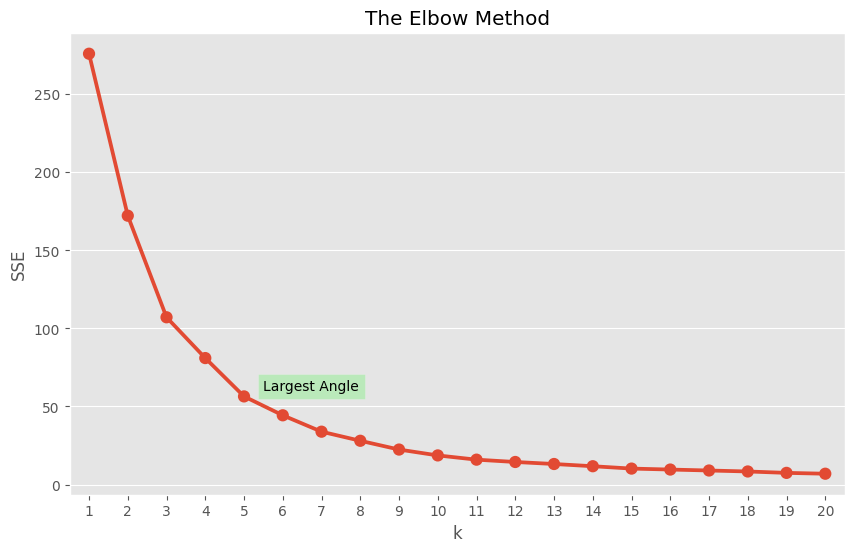

In [41]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_


plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

# **Running KMeans with 5 clusters**

In [42]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1)

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_rfm = data.assign(Cluster=cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,3
Alpha Cognac,65,20,70488.44,0
Amica Models & Co.,265,26,94117.26,0
"Anna's Decorations, Ltd",84,46,153996.13,3
Atelier graphique,188,7,24179.96,2


In [43]:
# Group the data by cluster
grouped = data_rfm.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         209.2      22.1       78633.2    43
1           2.0      38.8      132201.6     4
2         324.2      10.7       35628.7    12
3         126.5      37.1      133158.0    31
4           2.0     219.5      783576.1     2

# **Building Customer Personas**
**Customer Pesonas can build by determining the summary stats of RFM values or Snake Plot. Snake Plots is a Market Research technique used to compare segments. Visual representation of each segment's attributes helps us to determine the relative Importance of segment attributes**

## **Snake Plot**

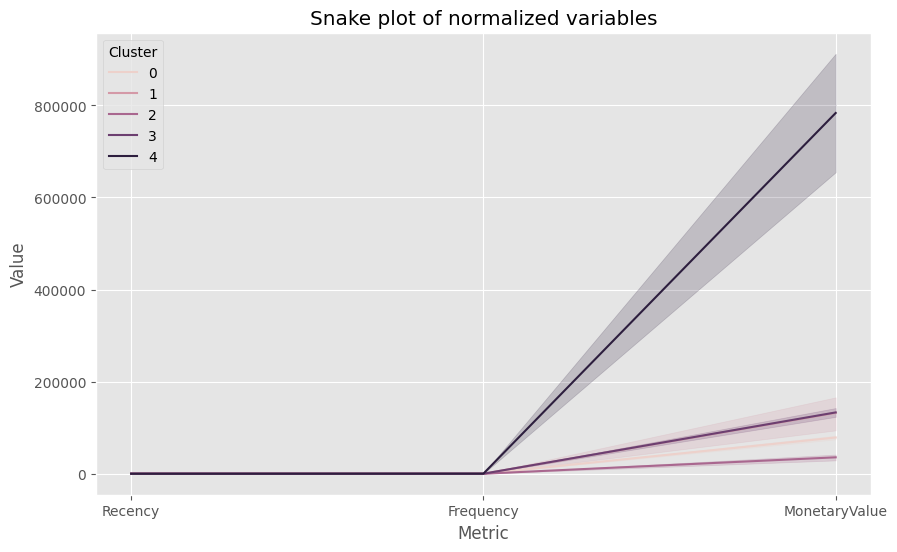

In [45]:
data_rfm_melt = pd.melt(data_rfm.reset_index(), id_vars=['CUSTOMERNAME', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                        var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=data_rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

# **Calculating relative importance of each attribute**

In [46]:
# Calculate average RFM values for each cluster
cluster_avg = data_rfm.groupby(['Cluster']).mean()
print(cluster_avg)

            Recency   Frequency  MonetaryValue
Cluster                                       
0        209.162791   22.093023   78633.205814
1          2.000000   38.750000  132201.635000
2        324.250000   10.666667   35628.653333
3        126.548387   37.129032  133158.014516
4          2.000000  219.500000  783576.085000


In [47]:
# Calculate average RFM values for the total customer population
population_avg = data.mean()
print(population_avg)

Recency             182.826087
Frequency            30.684783
MonetaryValue    109050.313587
dtype: float64


In [48]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           0.14      -0.28          -0.28
1          -0.99       0.26           0.21
2           0.77      -0.65          -0.67
3          -0.31       0.21           0.22
4          -0.99       6.15           6.19


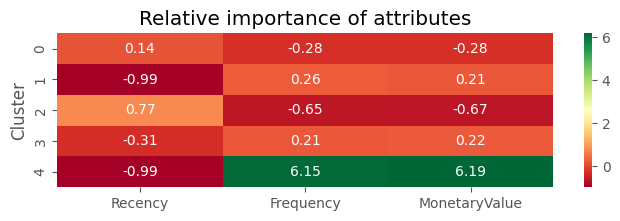

In [49]:
#Plot Relative Importance

# Initialize a plot with a figure size of 8 by 2 inches
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()